<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">ANN Home Prices Project
</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("kc_house_data.csv")

## Exploratory Data Analysis and Visualization

"kc_house_data" veri seti, 2014 yılında Seattle, Washington'da gerçekleşen ev satışları hakkındaki verileri içermektedir. Veri setinin tam olarak ne zaman toplandığı belirtilmemektedir, ancak veri setinin açıklamasında, ev satışlarının 2014 yılı Mayıs ve 2015 yılı Mayıs arasında gerçekleştiği belirtilmektedir.

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.isnull().sum().any()

False

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.000,4580474287.771,2876735715.748,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000
price,21597.000,540296.574,367368.140,78000.000,322000.000,450000.000,645000.000,7700000.000
bedrooms,21597.000,3.373,0.926,1.000,3.000,3.000,4.000,33.000
bathrooms,21597.000,2.116,0.769,0.500,1.750,2.250,2.500,8.000
sqft_living,21597.000,2080.322,918.106,370.000,1430.000,1910.000,2550.000,13540.000
sqft_lot,21597.000,15099.409,41412.637,520.000,5040.000,7618.000,10685.000,1651359.000
floors,21597.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,21597.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21597.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21597.000,3.410,0.651,1.000,3.000,3.000,4.000,5.000


### İd_number

In [7]:
df = df.drop('id', axis = 1)

### price

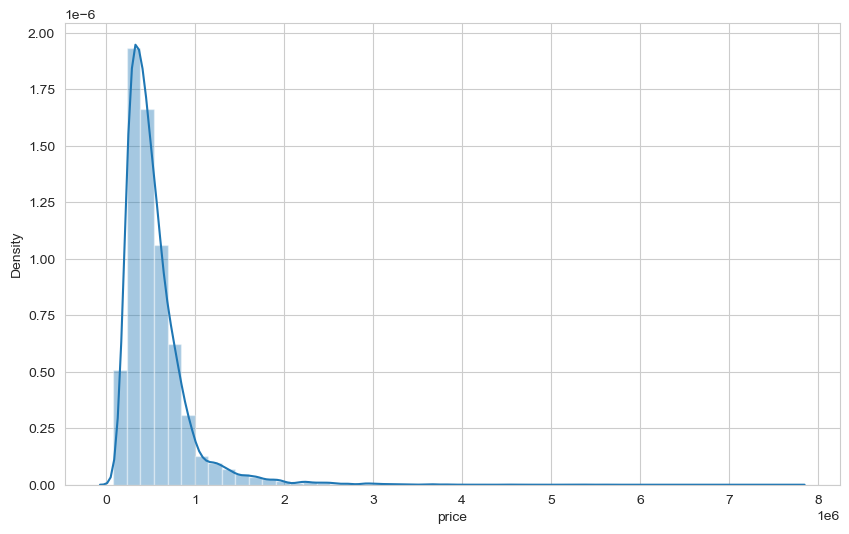

In [8]:
sns.distplot(df['price']);

In [9]:
# Outlier durumunu feature bazlı görelim
df[df["price"] > 3000000].sort_values(by="price", ascending=False)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,10/13/2014,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,1910,1987,98102,47.630,-122.323,3940,8800
3910,6/11/2014,7060000.000,5,4.500,10040,37325,2.000,1,2,3,11,7680,2360,1940,2001,98004,47.650,-122.214,3930,25449
9245,9/19/2014,6890000.000,6,7.750,9890,31374,2.000,0,4,3,13,8860,1030,2001,0,98039,47.630,-122.240,4540,42730
4407,8/4/2014,5570000.000,5,5.750,9200,35069,2.000,0,0,3,13,6200,3000,2001,0,98039,47.629,-122.233,3560,24345
1446,4/13/2015,5350000.000,5,5.000,8000,23985,2.000,0,4,3,12,6720,1280,2009,0,98004,47.623,-122.220,4600,21750
1313,4/13/2015,5300000.000,6,6.000,7390,24829,2.000,1,4,4,12,5000,2390,1991,0,98040,47.563,-122.210,4320,24619
1162,10/20/2014,5110000.000,5,5.250,8010,45517,2.000,1,4,3,12,5990,2020,1999,0,98033,47.677,-122.211,3430,26788
8085,6/17/2014,4670000.000,5,6.750,9640,13068,1.000,1,4,3,12,4820,4820,1983,2009,98040,47.557,-122.210,3270,10454
2624,8/15/2014,4500000.000,5,5.500,6640,40014,2.000,1,4,3,12,6350,290,2004,0,98155,47.749,-122.280,3030,23408
8629,6/18/2014,4490000.000,4,3.000,6430,27517,2.000,0,0,3,12,6430,0,2001,0,98004,47.621,-122.219,3720,14592


Bu kod parçası, bir "df" adlı veri çerçevesinin içindeki sütunlar arasındaki korelasyonları incelemek ve "price" (fiyat) sütununun diğer sütunlarla olan ilişkisini görselleştirmek için kullanılıyor.

In [10]:
correlation_matrix = df.corr(numeric_only=True)

In [11]:
price_correlation = correlation_matrix['price'].sort_values(ascending=False)

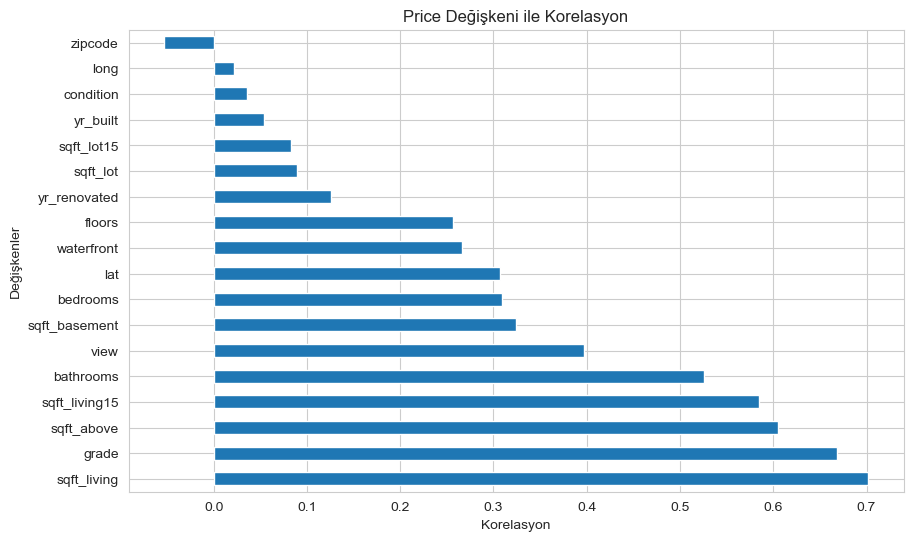

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
price_correlation.drop('price').plot(kind='barh')
plt.xlabel('Korelasyon')
plt.ylabel('Değişkenler')
plt.title('Price Değişkeni ile Korelasyon')
plt.show()


### sqft_living

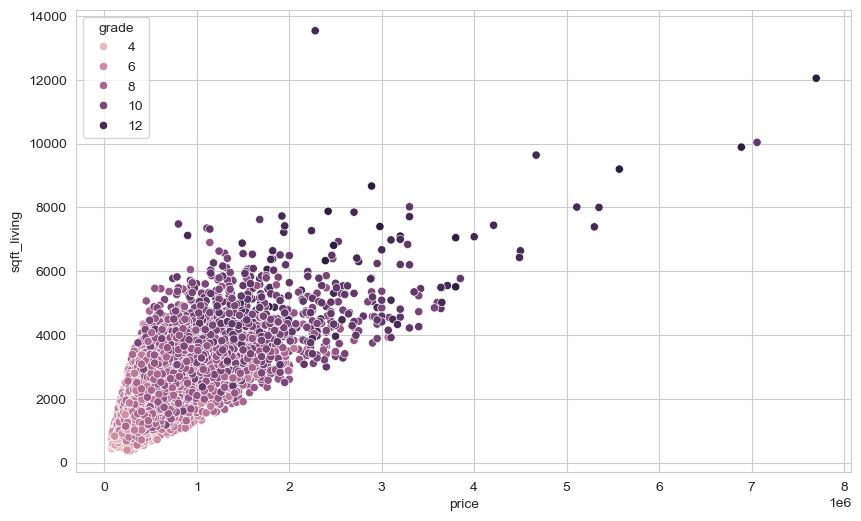

In [13]:
sns.scatterplot(x = "price", y = "sqft_living", data = df, hue = "grade");

### bedrooms and floors

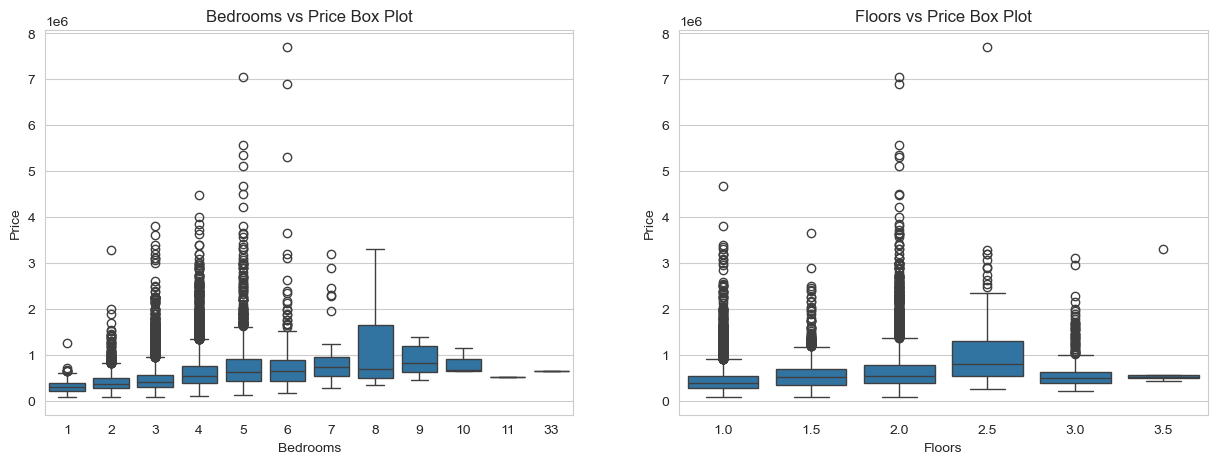

In [14]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1])

axes[0].set(xlabel='Bedrooms', ylabel='Price', title='Bedrooms vs Price Box Plot')
axes[1].set(xlabel='Floors', ylabel='Price', title='Floors vs Price Box Plot')
plt.show()

In [15]:
df[df["bedrooms"] > 10]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,8/21/2014,520000.000,11,3.000,3000,4960,2.000,0,0,3,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960
15856,6/25/2014,640000.000,33,1.750,1620,6000,1.000,0,0,5,7,1040,580,1947,0,98103,47.688,-122.331,1330,4700


In [16]:
df = df[df["bedrooms"] != 33]       # 15856. satırı bu şekilde verimizden çıkartabiliriz

In [17]:
df.shape

(21596, 20)

In [18]:
df[df["floors"] == 3.50]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10066,8/1/2014,435000.000,3,3.000,1440,1350,3.500,0,2,3,8,1440,0,2005,0,98103,47.653,-122.345,1440,1350
11582,1/30/2015,544000.000,3,2.500,1760,1755,3.500,0,0,3,8,1760,0,1998,0,98105,47.669,-122.279,1700,1721
14871,4/2/2015,525000.000,3,3.000,1730,1074,3.500,0,0,3,8,1730,0,2006,0,98107,47.669,-122.392,1370,1185
15410,4/16/2015,479000.000,2,2.500,1730,1037,3.500,0,0,3,8,1730,0,2008,0,98118,47.559,-122.285,1280,1026
18462,10/20/2014,3300000.000,8,4.000,7710,11750,3.500,0,0,5,12,6090,1620,1904,0,98112,47.626,-122.314,4210,8325
20292,9/18/2014,525000.000,2,2.750,1310,1268,3.500,0,0,3,8,1310,0,2007,0,98103,47.653,-122.355,1350,1288
20756,6/25/2014,563500.000,3,2.500,1400,1312,3.500,0,0,3,8,1400,0,2007,0,98103,47.653,-122.355,1350,1312


### date

In [19]:
df['date'].dtype

dtype('O')

In [20]:
df['date'] = pd.to_datetime(df['date'])

Bu kod satırı, "date" sütunundaki tarih verilerini pandas kütüphanesinin pd.to_datetime() işlevini kullanarak datetime veri türüne dönüştürmek için kullanılıyor. Tarih verileri genellikle metin veya sayısal veri türleri olarak saklanırken, datetime veri türü tarih ve saat bilgilerini daha etkili bir şekilde temsil etmek için kullanılır.

In [21]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21596, dtype: datetime64[ns]

In [22]:
df['year'] = df['date'].dt.year

df['month'] = df['date'].dt.month

Bu kod satırı, "date" sütunundaki tarih verilerinden yıl ve ay bilgisini ayıklamak ve yeni bir "year" ve "month" adlı sütunlarını oluşturmak için kullanılıyor. Böylece her veri noktası için tarih bilgisinden yıl ve ay bilgisi ayrı bir sütunda saklanmış olacak.

In [23]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,2014,10
1,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,12
2,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,2015,2
3,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,2014,12
4,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2015,2


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21596 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21596 non-null  datetime64[ns]
 1   price          21596 non-null  float64       
 2   bedrooms       21596 non-null  int64         
 3   bathrooms      21596 non-null  float64       
 4   sqft_living    21596 non-null  int64         
 5   sqft_lot       21596 non-null  int64         
 6   floors         21596 non-null  float64       
 7   waterfront     21596 non-null  int64         
 8   view           21596 non-null  int64         
 9   condition      21596 non-null  int64         
 10  grade          21596 non-null  int64         
 11  sqft_above     21596 non-null  int64         
 12  sqft_basement  21596 non-null  int64         
 13  yr_built       21596 non-null  int64         
 14  yr_renovated   21596 non-null  int64         
 15  zipcode        21596 non

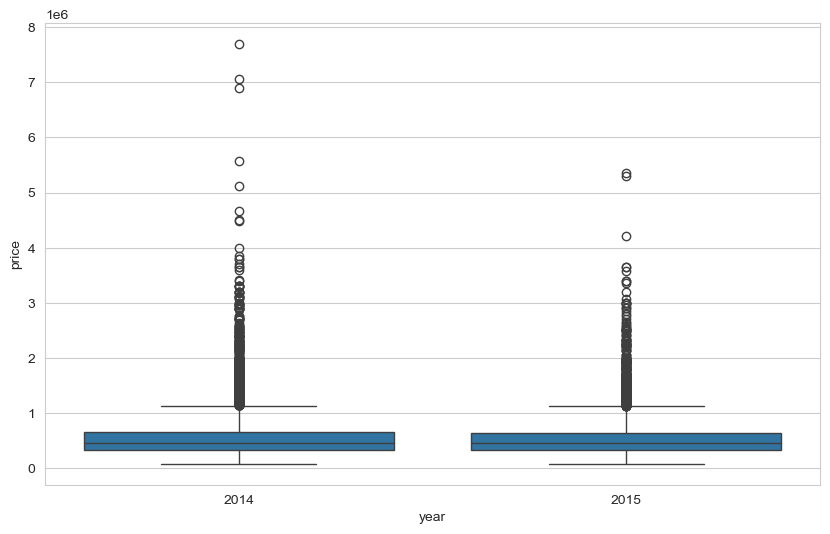

In [25]:
sns.boxplot(x = "year", y = "price", data = df);

In [26]:
month_dummy = pd.get_dummies(df["month"], prefix = "month")
df = pd.concat([df, month_dummy], axis = 1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,2014,10,False,False,False,False,False,False,False,False,False,True,False,False
1,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,12,False,False,False,False,False,False,False,False,False,False,False,True
2,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,2015,2,False,True,False,False,False,False,False,False,False,False,False,False
3,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,2014,12,False,False,False,False,False,False,False,False,False,False,False,True
4,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2015,2,False,True,False,False,False,False,False,False,False,False,False,False


Bu kod satırları, "month" sütunundaki ay verilerini kullanarak ikili (dummy) değişkenler oluşturup veri çerçevesine eklemek için kullanılıyor. Bu tür bir işlem, kategorik verileri modele uygun hale getirerek analiz yapmayı kolaylaştırır.

In [27]:
# modele giremeyecek olan featureleri çıkarıyoruz
df = df.drop(['date', "year", "month"], axis = 1)

### zipcode

In [28]:
df['zipcode'].value_counts(dropna = False)

zipcode
98103    601
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

Bu kod, veri çerçevesindeki "zipcode" (posta kodu) sütunundaki farklı posta kodlarının sayısını göstermeye yöneliktir. Aynı posta kodunun veri çerçevesinde kaç kez tekrarlandığını görmenizi sağlar.


value_counts() fonksiyonu, benzersiz değerleri sayarak veri dağılımını anlamak için sıkça kullanılır. dropna = False parametresi, veri çerçevesinde eksik (NaN) değerlerin de dahil edilmesini sağlar.

In [29]:
# zip kodu da kulanamayacağımız için çıkarıyoruz
df = df.drop('zipcode', axis = 1)

### latest data

In [30]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,47.511,-122.257,1340,5650,False,False,False,False,False,False,False,False,False,True,False,False
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,47.721,-122.319,1690,7639,False,False,False,False,False,False,False,False,False,False,False,True
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,47.738,-122.233,2720,8062,False,True,False,False,False,False,False,False,False,False,False,False
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,47.521,-122.393,1360,5000,False,False,False,False,False,False,False,False,False,False,False,True
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,47.617,-122.045,1800,7503,False,True,False,False,False,False,False,False,False,False,False,False


In [31]:
df.shape

(21596, 30)

## Preprocessing of Data
- Train | Test Split, Scalling

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df.drop('price', axis = 1).values
y = df['price'].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [35]:
from sklearn.preprocessing import MinMaxScaler 

In [36]:
scaler = MinMaxScaler()

In [37]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [40]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [41]:
X_train.shape

(19436, 29)

In [42]:
model = Sequential()

model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

**Val loss (doğrulama kaybı)** ve **loss (eğitim kaybı)**, modelin eğitimi sırasında hesaplanan iki farklı hata ölçüsüdür.

Eğitim kaybı (loss), modelin eğitim verilerine ne kadar iyi uyduğunu ölçer. Modelin eğitim verilerine mükemmel bir şekilde uyduğu durumlarda, eğitim kaybı sıfıra yakın olur. Ancak, eğitim kaybı ne kadar düşük olursa olsun, bu her zaman modelin gerçek hayatta iyi performans göstereceği anlamına gelmez. Bu nedenle, modelin performansını değerlendirmek için doğrulama kaybı (val loss) hesaplanır.

Doğrulama kaybı (val loss), modelin eğitim verilerinin bir bölümü üzerinde eğitildiğinde, modelin performansını değerlendirmek için ayrılan bir diğer veri bölümüne (doğrulama verisi) karşı ne kadar iyi genelleştirildiğini ölçer. Doğrulama kaybı, eğitim kaybından daha yüksek olabilir, çünkü modelin yeni veriler üzerinde performansı daha düşük olabilir.

Genellikle, eğitim kaybı doğrulama kaybından daha düşüktür, ancak modelin overfitting yapması durumunda doğrulama kaybı yükselirken, eğitim kaybı düşük kalır. Bu nedenle, eğitim sürecinde doğrulama kaybının takibi önemlidir, çünkü modelin gerçek hayatta ne kadar iyi performans gösterdiği konusunda bir fikir verir ve overfitting durumunu tespit edebilir.

**Validation split**, veri kümesinin belirli bir yüzdesinin doğrulama verisi olarak ayrılmasıdır. Bu yüzde, genellikle %10 ile %30 arasında değişebilir ve bu oran, veri kümesinin büyüklüğüne ve modele göre değişebilir.

In [43]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 500)

Epoch 1/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 428047302656.0000 - val_loss: 421657903104.0000
Epoch 2/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 428357255168.0000 - val_loss: 282376601600.0000
Epoch 3/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 194273067008.0000 - val_loss: 103417470976.0000
Epoch 4/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92546588672.0000 - val_loss: 99624124416.0000
Epoch 5/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91704967168.0000 - val_loss: 96060956672.0000
Epoch 6/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91542986752.0000 - val_loss: 92355379200.0000
Epoch 7/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 79090671616.0000 - val_loss: 88372297728.0000
Epoch 8/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74106585088.0000 - val_loss: 83979059200.0000
Epoch 9/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69131378688.0000 - val_loss: 79378120704.0000
Epoch 10/500
130/130 ━━━━━━━━━━

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29077254144.0000 - val_loss: 32381890560.0000
Epoch 116/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30518157312.0000 - val_loss: 32290316288.0000
Epoch 117/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29832339456.0000 - val_loss: 32372512768.0000
Epoch 118/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29970776064.0000 - val_loss: 32760358912.0000
Epoch 119/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30497429504.0000 - val_loss: 33113761792.0000
Epoch 120/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30276988928.0000 - val_loss: 32604733440.0000
Epoch 121/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30424236032.0000 - val_loss: 32132745216.0000
Epoch 122/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30963462144.0000 - val_loss: 32557492224.0000
Epoch 123/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28744482816.0000 - val_loss: 32162848768.0000
Epoch 124/500
130/130 ━━━━━━━━━━━

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27973840896.0000 - val_loss: 29828988928.0000
Epoch 230/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25719773184.0000 - val_loss: 29380524032.0000
Epoch 231/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28244508672.0000 - val_loss: 29515798528.0000
Epoch 232/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26514417664.0000 - val_loss: 29517776896.0000
Epoch 233/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26871371776.0000 - val_loss: 29471059968.0000
Epoch 234/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26477127680.0000 - val_loss: 29791842304.0000
Epoch 235/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27356037120.0000 - val_loss: 29213353984.0000
Epoch 236/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28334901248.0000 - val_loss: 29569888256.0000
Epoch 237/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26593857536.0000 - val_loss: 29378840576.0000
Epoch 238/500
130/130 ━━━━━━━━━━━

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24329191424.0000 - val_loss: 28711108608.0000
Epoch 344/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24868595712.0000 - val_loss: 28442056704.0000
Epoch 345/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25562400768.0000 - val_loss: 28361752576.0000
Epoch 346/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25767522304.0000 - val_loss: 28714541056.0000
Epoch 347/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24330338304.0000 - val_loss: 28812058624.0000
Epoch 348/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26340327424.0000 - val_loss: 28781330432.0000
Epoch 349/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24753473536.0000 - val_loss: 28958072832.0000
Epoch 350/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25338796032.0000 - val_loss: 28412989440.0000
Epoch 351/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24365600768.0000 - val_loss: 28876478464.0000
Epoch 352/500
130/130 ━━━━━━━━━━━

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22316109824.0000 - val_loss: 28862824448.0000
Epoch 458/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23461081088.0000 - val_loss: 28951302144.0000
Epoch 459/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23353214976.0000 - val_loss: 29072975872.0000
Epoch 460/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23982544896.0000 - val_loss: 28791515136.0000
Epoch 461/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24024770560.0000 - val_loss: 28730669056.0000
Epoch 462/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23557513216.0000 - val_loss: 29051213824.0000
Epoch 463/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23668068352.0000 - val_loss: 29037246464.0000
Epoch 464/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24061489152.0000 - val_loss: 29318483968.0000
Epoch 465/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22320508928.0000 - val_loss: 28813535232.0000
Epoch 466/500
130/130 ━━━━━━━━━━━

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,237 (43.90 KB)

 Trainable params: 3,745 (14.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,492 (29.27 KB)

In [45]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,429255294976.000,421657903104.000
1,390536757248.000,282376601600.000
2,141337034752.000,103417470976.000
3,94933893120.000,99624124416.000
4,90447011840.000,96060956672.000
...,...,...
495,22842587136.000,28778838016.000
496,22761762816.000,28553379840.000
497,22730348544.000,28847128576.000
498,22572560384.000,28341671936.000


<Axes: >

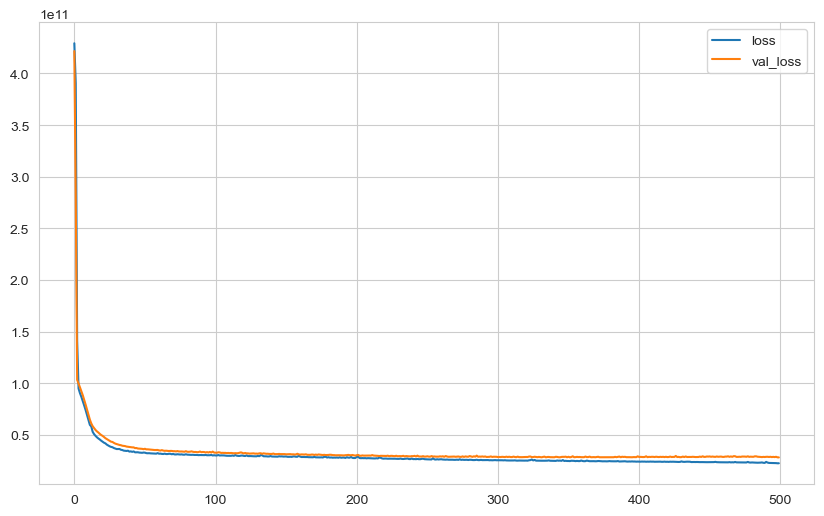

In [46]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [47]:
model.evaluate(X_test, y_test, verbose=0)

21244659712.0

In [48]:
y_pred = model.predict(X_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [49]:
eval_metric(y_test, y_pred)

r2_score: 0.833761777848837 
mae: 89920.9347583912 
mse: 21358247206.83568 
rmse: 146144.6105979816


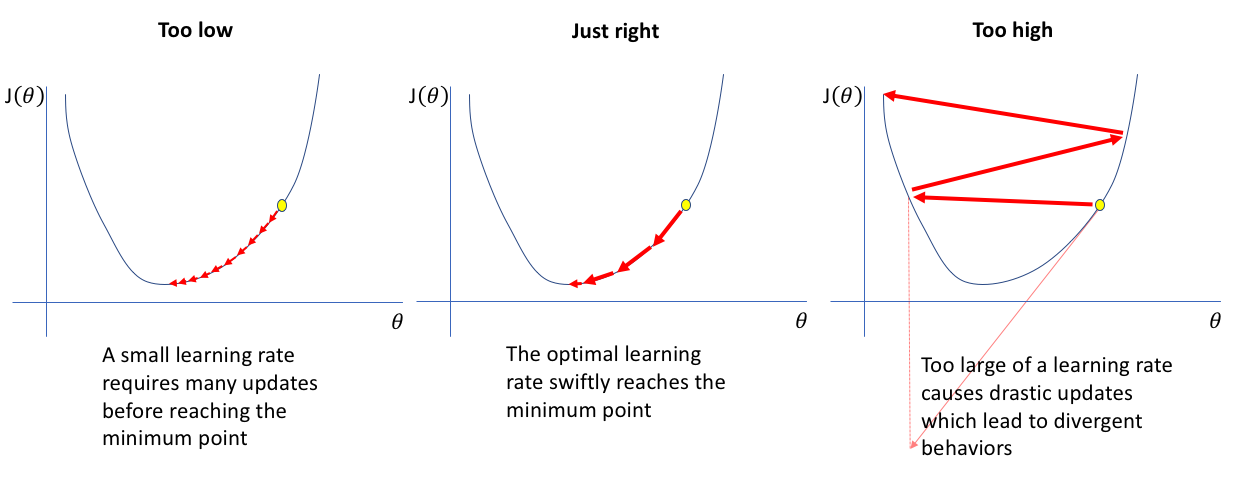

# learning_rate

Learning rate (öğrenme oranı), derin öğrenme modellerinin eğitiminde önemli bir hiperparametredir. Bu parametre, modelin ne kadar hızlı veya yavaş öğreneceğini belirler.

Öğrenme oranı, gradient descent yöntemi kullanılarak modelin ağırlıklarının güncellenmesinde kullanılır. Gradient descent, loss fonksiyonunun minimum değerine ulaşmak için modelin ağırlıklarının güncellenmesi için kullanılan bir optimizasyon algoritmasıdır. Gradient descent'in temel amacı, loss fonksiyonunun minimum noktasına doğru bir adım atarak, modelin loss değerini azaltmaktır.

Optimal öğrenme oranı, veri setine, modelin karmaşıklığına ve eğitim algoritmasına bağlı olarak değişebilir. İdeal öğrenme oranı, modelin loss değerini minimuma indirmesi için en uygun oranı sağlar. Öğrenme oranının belirlenmesi, eğitim sırasında kullanılan validation set ile kontrol edilir ve hiperparametre ayarlaması yapılır.

In [50]:
from tensorflow.keras.optimizers import Adam

In [51]:
model = Sequential()

model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

opt = Adam(learning_rate = 0.003)      # default learning rate value is 0.001 - eski sürümde "lr" olarak kayıtlı bu parametre
model.compile(optimizer = opt, loss = 'mse')

In [52]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 64, epochs = 500)

Epoch 1/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 364239454208.0000 - val_loss: 98268053504.0000
Epoch 2/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 90795163648.0000 - val_loss: 75690508288.0000
Epoch 3/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60873203712.0000 - val_loss: 56752558080.0000
Epoch 4/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45461110784.0000 - val_loss: 50268635136.0000
Epoch 5/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42091782144.0000 - val_loss: 47678226432.0000
Epoch 6/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42314113024.0000 - val_loss: 44814114816.0000
Epoch 7/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36739686400.0000 - val_loss: 43296419840.0000
Epoch 8/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39627776000.0000 - val_loss: 41866862592.0000
Epoch 9/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35377610752.0000 - val_loss: 41297842176.0000
Epoch 10/500
259/259 ━━━━━━━━━━━━━━━

259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24884828160.0000 - val_loss: 29859014656.0000
Epoch 116/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25447505920.0000 - val_loss: 29557303296.0000
Epoch 117/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25151700992.0000 - val_loss: 29510461440.0000
Epoch 118/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25224656896.0000 - val_loss: 29674885120.0000
Epoch 119/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25896239104.0000 - val_loss: 29517596672.0000
Epoch 120/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26727233536.0000 - val_loss: 30283458560.0000
Epoch 121/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25831835648.0000 - val_loss: 29576413184.0000
Epoch 122/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26509479936.0000 - val_loss: 29529550848.0000
Epoch 123/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25857757184.0000 - val_loss: 30167181312.0000
Epoch 124/500
259/259 ━━━━━━━━━━━

259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25408583680.0000 - val_loss: 29864425472.0000
Epoch 230/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23516930048.0000 - val_loss: 29696473088.0000
Epoch 231/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23259695104.0000 - val_loss: 29645352960.0000
Epoch 232/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23970045952.0000 - val_loss: 29757655040.0000
Epoch 233/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22130827264.0000 - val_loss: 30456791040.0000
Epoch 234/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23459551232.0000 - val_loss: 29399582720.0000
Epoch 235/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24863959040.0000 - val_loss: 29761191936.0000
Epoch 236/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23732598784.0000 - val_loss: 29700921344.0000
Epoch 237/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23749142528.0000 - val_loss: 29543452672.0000
Epoch 238/500
259/259 ━━━━━━━━━━━

259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14585717760.0000 - val_loss: 20931653632.0000
Epoch 344/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14583245824.0000 - val_loss: 19611564032.0000
Epoch 345/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13705761792.0000 - val_loss: 19648956416.0000
Epoch 346/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13775090688.0000 - val_loss: 19956705280.0000
Epoch 347/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13894726656.0000 - val_loss: 20946403328.0000
Epoch 348/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13178169344.0000 - val_loss: 20967829504.0000
Epoch 349/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13110197248.0000 - val_loss: 21227335680.0000
Epoch 350/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14210059264.0000 - val_loss: 20916258816.0000
Epoch 351/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13628423168.0000 - val_loss: 21069932544.0000
Epoch 352/500
259/259 ━━━━━━━━━━━

259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11040572416.0000 - val_loss: 18478350336.0000
Epoch 458/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10964694016.0000 - val_loss: 19029944320.0000
Epoch 459/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10422103040.0000 - val_loss: 18397581312.0000
Epoch 460/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10528235520.0000 - val_loss: 18467043328.0000
Epoch 461/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10475832320.0000 - val_loss: 17628520448.0000
Epoch 462/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10806999040.0000 - val_loss: 18598832128.0000
Epoch 463/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10756678656.0000 - val_loss: 18103592960.0000
Epoch 464/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10508548096.0000 - val_loss: 17069056000.0000
Epoch 465/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10844906496.0000 - val_loss: 18107820032.0000
Epoch 466/500
259/259 ━━━━━━━━━━━

<Axes: >

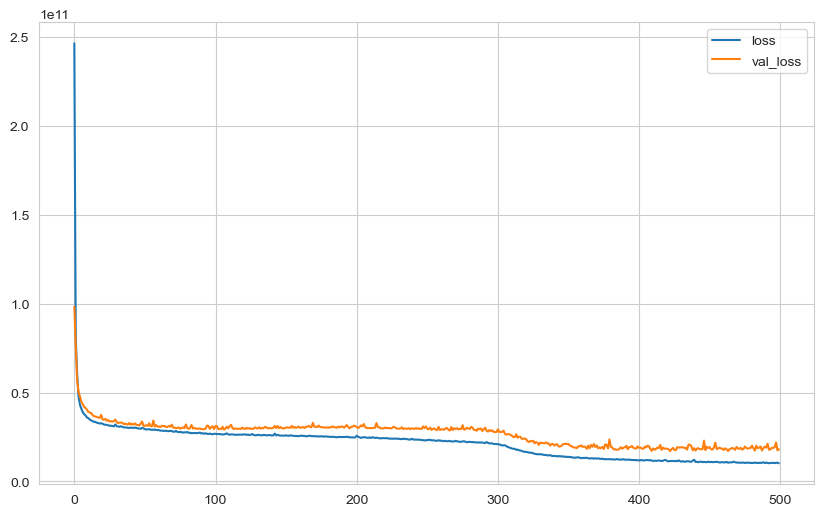

In [53]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

# Burdaki ayrilma overfitting gostergesi olabilir ve bundan kaynakli earlystopping ya da dropout kullanilmali burdaki hali vanilla hali


In [54]:
y_pred = model.predict(X_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [55]:
eval_metric(y_test, y_pred)

r2_score: 0.8786666847594705 
mae: 70820.57190393518 
mse: 15588875457.147816 
rmse: 124855.41821301875


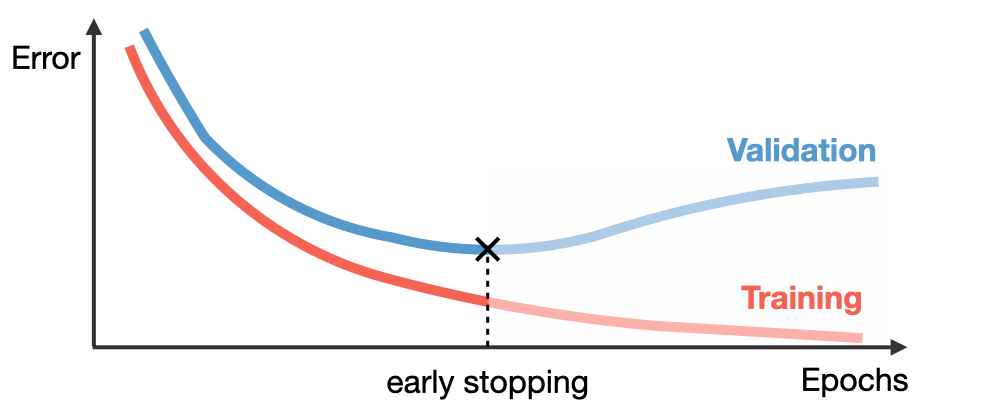

### EarlyStopping

Early stopping, derin öğrenme modellerinde overfitting (aşırı öğrenme) sorununu önlemek için kullanılan bir tekniktir. Bu teknik, eğitim sırasında modelin belirli bir noktada eğitimden çıkarılmasını sağlayarak, overfitting riskini azaltır.

Early stopping, modelin aşırı uyumu engellemek için, eğitim sırasında oluşan validation loss değerlerinin incelenmesiyle gerçekleştirilir. Eğitim sırasında, her epoch sonunda modelin validation set üzerindeki loss değeri hesaplanır. Bu değerler, bir "patlama" yaşanmadan önceki en düşük kayıp değerini kaydeder.

Patlama, modelin aşırı öğrenme durumunda aşırı uygunluk gösterdiği ve validation loss'un arttığı bir noktadır. Early stopping tekniği, patlamadan sonra, modelin daha iyi bir performans gösteremeyeceğini varsayarak, eğitimi sonlandırır.

Early stopping, modelin aşırı uyumu önlerken, aynı zamanda zaman ve işlemci gücü kaynaklarını tasarruf etmeye yardımcı olabilir. Ancak, early stopping'in kullanımı, doğru bir şekilde uygulanmalı ve optimal bir epoch sayısı seçilmelidir. Aksi takdirde, modelin yeterince eğitim alamaması veya eğitimin erken sona ermesi gibi sorunlar ortaya çıkabilir.

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
model = Sequential()

model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

opt = Adam(learning_rate = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [58]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 50)

# verbose = 1 yazilmasinin sebebi model earlystopping yaptiginda cikti yazmasi icin

# patience = 50 ayarlandığında, belirlenen metrikte 50 epoch boyunca iyileşme olmazsa eğitim durdurulur. 
# Bu, modelin aşırı uyumundan kaçınmak ve eğitim süresini optimize etmek için kullanılır.

In [59]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 431995453440.0000 - val_loss: 110631124992.0000
Epoch 2/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 89574457344.0000 - val_loss: 95350185984.0000
Epoch 3/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 84963598336.0000 - val_loss: 79314092032.0000
Epoch 4/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 66369421312.0000 - val_loss: 65117753344.0000
Epoch 5/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54904950784.0000 - val_loss: 55549546496.0000
Epoch 6/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49698848768.0000 - val_loss: 51128696832.0000
Epoch 7/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45341593600.0000 - val_loss: 47852687360.0000
Epoch 8/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46239793152.0000 - val_loss: 44514181120.0000
Epoch 9/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40016879616.0000 - val_loss: 42411167744.0000
Epoch 10/1000
130/130 ━━━━

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25801000960.0000 - val_loss: 29008308224.0000
Epoch 116/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26155030528.0000 - val_loss: 29193992192.0000
Epoch 117/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26304126976.0000 - val_loss: 29398562816.0000
Epoch 118/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24681664512.0000 - val_loss: 29404755968.0000
Epoch 119/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25776873472.0000 - val_loss: 29010601984.0000
Epoch 120/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25733468160.0000 - val_loss: 28829491200.0000
Epoch 121/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25249384448.0000 - val_loss: 29148737536.0000
Epoch 122/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24846628864.0000 - val_loss: 29459847168.0000
Epoch 123/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26163646464.0000 - val_loss: 29391138816.0000
Epoch 124/1000
130/130 ━━

Epoch 172/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24278462464.0000 - val_loss: 29751543808.0000
Epoch 173/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23413594112.0000 - val_loss: 29341011968.0000
Epoch 174/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24537077760.0000 - val_loss: 28792846336.0000
Epoch 175/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24183468032.0000 - val_loss: 29496246272.0000
Epoch 176/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24135794688.0000 - val_loss: 29042284544.0000
Epoch 177/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23235653632.0000 - val_loss: 29096474624.0000
Epoch 178/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24309035008.0000 - val_loss: 29561403392.0000
Epoch 179/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24876961792.0000 - val_loss: 29570336768.0000
Epoch 180/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25863030784.0000 - val_loss: 29385496576.0000
Epoch 181/

<Axes: >

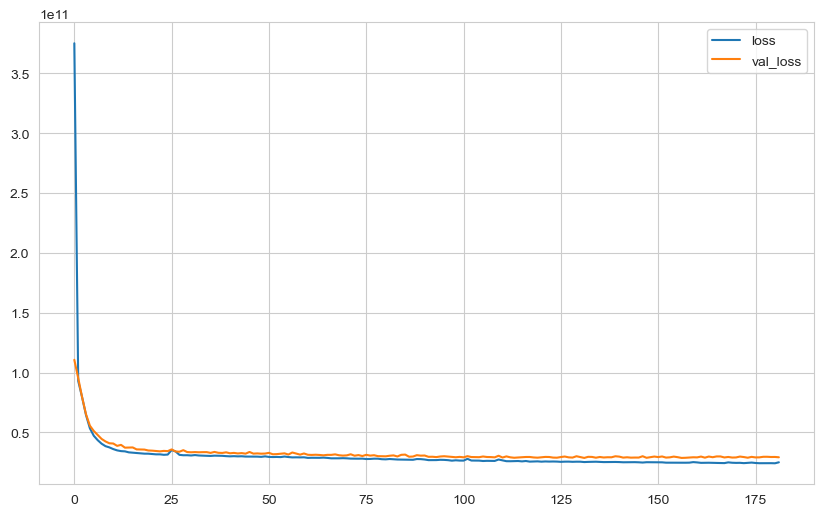

In [60]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [61]:
y_pred = model.predict(X_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [62]:
eval_metric(y_test, y_pred)

r2_score: 0.8256166128848174 
mae: 93693.62309027778 
mse: 22404736062.351692 
rmse: 149682.11670854903


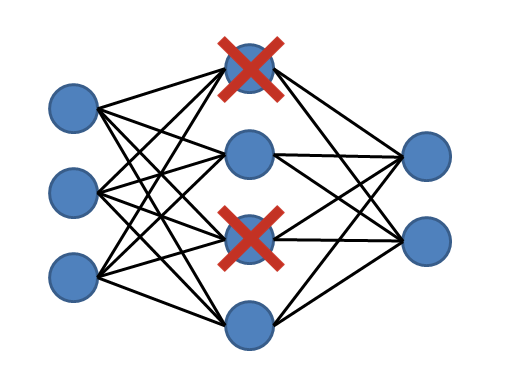

### Dropout

Dropout, derin öğrenme modellerinde overfitting (aşırı öğrenme) sorununu önlemek için kullanılan bir tekniktir. Bu teknik, eğitim sırasında rastgele bazı nöronların devre dışı bırakılması ile gerçekleştirilir.

Dropout, bir eğitim adımında, her bir nöronun bağlantılarının belirli bir olasılıkla kapatılmasını içerir. Bu, modele giriş verilerinin farklı bir alt kümesinin kullanılmasıyla sonuçlanır. Bu, her bir eğitim adımında farklı bir model oluşturarak, modele aşırı uyumlu hale gelme riskini azaltır.

Dropout tekniği, nöronların öğrenilen özelliklerini diğer nöronlarla paylaşmak zorunda olmadığı için ayrık özellikler (sparse features) oluşturarak, modelin daha iyi genelleme yapmasına yardımcı olabilir. Ayrıca, dropout teknikleri, modele gürbüzlük (robustness) kazandırarak, ağırlıklı verilerin ve gürültülü verilerin etkilerini azaltabilir.

Dropout, derin öğrenme modellerinin genellikle birçok parametreye sahip olmasından kaynaklanan overfitting sorununa karşı etkili bir çözüm sağlayabilir. Ancak, dropout'un kullanımı, modele bir miktar eğitim zamanı ekler ve daha fazla eğitim adımı gerektirir. Ayrıca, dropout bazı durumlarda nöronların önemli özelliklerini atlayarak modelin performansını azaltabilir. Bu nedenle, dropout tekniği doğru bir şekilde uygulanmalı ve optimal bir olasılık değeri seçilmelidir.

In [63]:
from tensorflow.keras.layers import Dropout

In [64]:
model = Sequential()

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

opt = Adam(learning_rate = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [65]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25)

In [66]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, callbacks = [early_stop
                                                                                                        

Epoch 1/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 407981719552.0000 - val_loss: 106845110272.0000
Epoch 2/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 129785544704.0000 - val_loss: 97734361088.0000
Epoch 3/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 114594725888.0000 - val_loss: 82601295872.0000
Epoch 4/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 104596316160.0000 - val_loss: 67530301440.0000
Epoch 5/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 97380392960.0000 - val_loss: 59306610688.0000
Epoch 6/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 77168680960.0000 - val_loss: 55268003840.0000
Epoch 7/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73366110208.0000 - val_loss: 51221725184.0000
Epoch 8/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71672201216.0000 - val_loss: 48639000576.0000
Epoch 9/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73694003200.0000 - val_loss: 50025897984.0000
Epoch 10/1000
130/130 ━

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57608953856.0000 - val_loss: 32540966912.0000
Epoch 116/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53834358784.0000 - val_loss: 32683079680.0000
Epoch 117/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57069309952.0000 - val_loss: 31837483008.0000
Epoch 118/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60110221312.0000 - val_loss: 32335671296.0000
Epoch 119/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54535540736.0000 - val_loss: 31562940416.0000
Epoch 120/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58118385664.0000 - val_loss: 30068279296.0000
Epoch 121/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52594409472.0000 - val_loss: 34077960192.0000
Epoch 122/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58118569984.0000 - val_loss: 32199852032.0000
Epoch 123/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57478086656.0000 - val_loss: 32198797312.0000
Epoch 124/1000
130/130 ━━

Epoch 172/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56191758336.0000 - val_loss: 30207004672.0000
Epoch 172: early stopping


<Axes: >

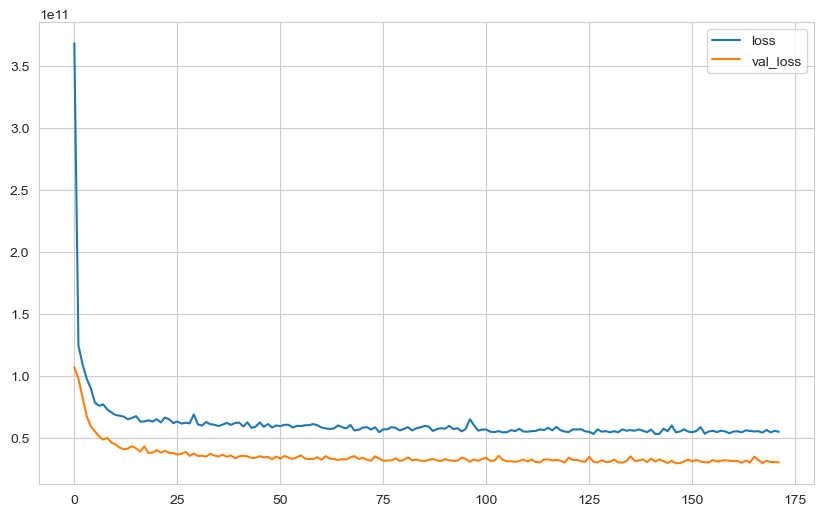

In [67]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
# dropout u kullandigimizda daha cok overfit gozlemlendi R2 score da 0.01 daha kotu bi score cikartti 

In [68]:
y_pred = model.predict(X_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [69]:
eval_metric(y_test, y_pred)

r2_score: 0.812092781933262 
mae: 97984.24259259259 
mse: 24142274643.48572 
rmse: 155377.84476393578


## Saving Final Model and Scaler

In [70]:
from sklearn.preprocessing import MinMaxScaler
import pickle

scaler = MinMaxScaler().fit(X)
pickle.dump(scaler, open("scaler_kc_house", 'wb'))

In [71]:
X_scaled = scaler.transform(X)

In [72]:
model = Sequential()

model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

opt = Adam(learning_rate = 0.003) # default learning rate value is 0.001
model.compile(optimizer = opt, loss = 'mse')

In [73]:
#early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25)

In [74]:
model.fit(x=X_scaled,         
          y=y,             
          validation_split= 0.1,  
          batch_size=64,     
          epochs=1000,         
          # callbacks=[early_stop]  
         )


Epoch 1/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 337610997760.0000 - val_loss: 96624205824.0000
Epoch 2/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 95003770880.0000 - val_loss: 70037733376.0000
Epoch 3/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 56437313536.0000 - val_loss: 54970601472.0000
Epoch 4/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 41275940864.0000 - val_loss: 49626664960.0000
Epoch 5/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 41213337600.0000 - val_loss: 47332503552.0000
Epoch 6/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34673414144.0000 - val_loss: 44402614272.0000
Epoch 7/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34169227264.0000 - val_loss: 45130940416.0000
Epoch 8/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33637304320.0000 - val_loss: 41835991040.0000
Epoch 9/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 33998639104.0000 - val_loss: 41662275584.0000
Epoch 10/1000
304/304 ━━━━━

304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17440575488.0000 - val_loss: 26340984832.0000
Epoch 116/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17372764160.0000 - val_loss: 29464799232.0000
Epoch 117/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16880759808.0000 - val_loss: 25789790208.0000
Epoch 118/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16685460480.0000 - val_loss: 27071791104.0000
Epoch 119/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16746119168.0000 - val_loss: 25064820736.0000
Epoch 120/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16480549888.0000 - val_loss: 25302984704.0000
Epoch 121/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16699219968.0000 - val_loss: 25374722048.0000
Epoch 122/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17460174848.0000 - val_loss: 25888854016.0000
Epoch 123/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16578612224.0000 - val_loss: 25214728192.0000
Epoch 124/1000
304/304 ━━

Epoch 172/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13748626432.0000 - val_loss: 24305905664.0000
Epoch 173/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13797172224.0000 - val_loss: 23375054848.0000
Epoch 174/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13499361280.0000 - val_loss: 26687737856.0000
Epoch 175/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13488102400.0000 - val_loss: 25869002752.0000
Epoch 176/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14196185088.0000 - val_loss: 23248472064.0000
Epoch 177/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13138393088.0000 - val_loss: 25393205248.0000
Epoch 178/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14036255744.0000 - val_loss: 24070815744.0000
Epoch 179/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13498464256.0000 - val_loss: 25037651968.0000
Epoch 180/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13544233984.0000 - val_loss: 25590454272.0000
Epoch 181/

Epoch 229/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11680056320.0000 - val_loss: 21504337920.0000
Epoch 230/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11444392960.0000 - val_loss: 20447412224.0000
Epoch 231/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11725551616.0000 - val_loss: 20132974592.0000
Epoch 232/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11416896512.0000 - val_loss: 22188546048.0000
Epoch 233/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11917813760.0000 - val_loss: 20445538304.0000
Epoch 234/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11008854016.0000 - val_loss: 20875116544.0000
Epoch 235/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11155445760.0000 - val_loss: 20655575040.0000
Epoch 236/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11690490880.0000 - val_loss: 19847659520.0000
Epoch 237/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11993136128.0000 - val_loss: 21495511040.0000
Epoch 238/

Epoch 286/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10647864320.0000 - val_loss: 19821369344.0000
Epoch 287/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11128542208.0000 - val_loss: 24104452096.0000
Epoch 288/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10452702208.0000 - val_loss: 20046487552.0000
Epoch 289/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10953018368.0000 - val_loss: 20191068160.0000
Epoch 290/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10135777280.0000 - val_loss: 19632136192.0000
Epoch 291/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10860437504.0000 - val_loss: 21921779712.0000
Epoch 292/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10968150016.0000 - val_loss: 20425136128.0000
Epoch 293/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10198970368.0000 - val_loss: 20092149760.0000
Epoch 294/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11089568768.0000 - val_loss: 19664322560.0000
Epoch 295/

Epoch 343/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10207870976.0000 - val_loss: 20401502208.0000
Epoch 344/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10619785216.0000 - val_loss: 19054800896.0000
Epoch 345/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10100267008.0000 - val_loss: 21177055232.0000
Epoch 346/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10142331904.0000 - val_loss: 21062219776.0000
Epoch 347/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10580686848.0000 - val_loss: 23302238208.0000
Epoch 348/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9989791744.0000 - val_loss: 19465187328.0000
Epoch 349/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10484086784.0000 - val_loss: 19861231616.0000
Epoch 350/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9862851584.0000 - val_loss: 17609068544.0000
Epoch 351/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9950041088.0000 - val_loss: 19723692032.0000
Epoch 352/100

304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9218464768.0000 - val_loss: 19732740096.0000
Epoch 401/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9572967424.0000 - val_loss: 24657088512.0000
Epoch 402/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9972621312.0000 - val_loss: 19462502400.0000
Epoch 403/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9632775168.0000 - val_loss: 19786416128.0000
Epoch 404/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9854912512.0000 - val_loss: 18345125888.0000
Epoch 405/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9531709440.0000 - val_loss: 22029545472.0000
Epoch 406/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9980262400.0000 - val_loss: 20203530240.0000
Epoch 407/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9686934528.0000 - val_loss: 19151826944.0000
Epoch 408/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9660800000.0000 - val_loss: 19812122624.0000
Epoch 409/1000
304/304 ━━━━━━━━━━━

304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8690903040.0000 - val_loss: 19228506112.0000
Epoch 515/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8628655104.0000 - val_loss: 18730782720.0000
Epoch 516/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8633208832.0000 - val_loss: 21181802496.0000
Epoch 517/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8729605120.0000 - val_loss: 19762722816.0000
Epoch 518/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9011089408.0000 - val_loss: 19439259648.0000
Epoch 519/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9029237760.0000 - val_loss: 19131774976.0000
Epoch 520/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9250341888.0000 - val_loss: 18684106752.0000
Epoch 521/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8943940608.0000 - val_loss: 22888673280.0000
Epoch 522/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9098827776.0000 - val_loss: 19830253568.0000
Epoch 523/1000
304/304 ━━━━━━━━━━━

304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8420467200.0000 - val_loss: 21108514816.0000
Epoch 629/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8590199808.0000 - val_loss: 21048215552.0000
Epoch 630/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8292283904.0000 - val_loss: 21779673088.0000
Epoch 631/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8572600832.0000 - val_loss: 19850158080.0000
Epoch 632/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8226286080.0000 - val_loss: 21384470528.0000
Epoch 633/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8252834304.0000 - val_loss: 21200191488.0000
Epoch 634/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8248817664.0000 - val_loss: 20623884288.0000
Epoch 635/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8247018496.0000 - val_loss: 22924408832.0000
Epoch 636/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8301480448.0000 - val_loss: 21607069696.0000
Epoch 637/1000
304/304 ━━━━━━━━━━━

304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7815514112.0000 - val_loss: 20355815424.0000
Epoch 743/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8160714240.0000 - val_loss: 20644159488.0000
Epoch 744/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7650852352.0000 - val_loss: 20656093184.0000
Epoch 745/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7757890560.0000 - val_loss: 19615797248.0000
Epoch 746/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8025763840.0000 - val_loss: 21287024640.0000
Epoch 747/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7804738048.0000 - val_loss: 23312990208.0000
Epoch 748/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7487955456.0000 - val_loss: 20475060224.0000
Epoch 749/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7973716992.0000 - val_loss: 21153843200.0000
Epoch 750/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7923276288.0000 - val_loss: 20927950848.0000
Epoch 751/1000
304/304 ━━━━━━━━━━━

304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7394326016.0000 - val_loss: 22758881280.0000
Epoch 857/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7451296768.0000 - val_loss: 20645597184.0000
Epoch 858/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7474339328.0000 - val_loss: 22737223680.0000
Epoch 859/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7110181376.0000 - val_loss: 25886957568.0000
Epoch 860/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7445279744.0000 - val_loss: 22961238016.0000
Epoch 861/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7474156544.0000 - val_loss: 21218551808.0000
Epoch 862/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7342573056.0000 - val_loss: 20711462912.0000
Epoch 863/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7454078464.0000 - val_loss: 21459339264.0000
Epoch 864/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7881461760.0000 - val_loss: 22588975104.0000
Epoch 865/1000
304/304 ━━━━━━━━━━━

304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6903580160.0000 - val_loss: 23363371008.0000
Epoch 971/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7085639168.0000 - val_loss: 22629109760.0000
Epoch 972/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6806011392.0000 - val_loss: 24224247808.0000
Epoch 973/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7301423104.0000 - val_loss: 22012506112.0000
Epoch 974/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7023458304.0000 - val_loss: 21706889216.0000
Epoch 975/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6789305856.0000 - val_loss: 25692391424.0000
Epoch 976/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7235235840.0000 - val_loss: 24182775808.0000
Epoch 977/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7056210944.0000 - val_loss: 22429857792.0000
Epoch 978/1000
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7148221952.0000 - val_loss: 22126016512.0000
Epoch 979/1000
304/304 ━━━━━━━━━━━

<Axes: >

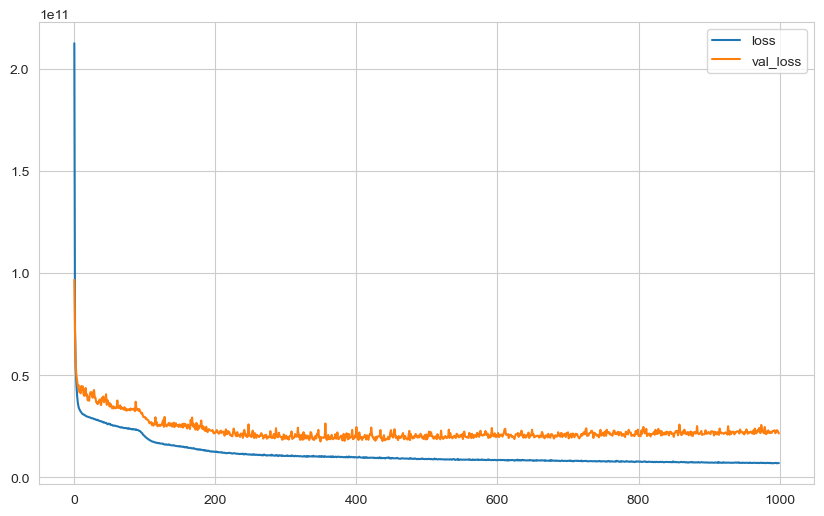

In [75]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [76]:
y_pred = model.predict(X_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [77]:
eval_metric(y_test, y_pred)

r2_score: 0.9448665172361644 
mae: 57809.95445601852 
mse: 7083536740.263296 
rmse: 84163.7495615737


### Saving Final Model and Scaler

In [1]:
from tensorflow.keras.saving import save_model

save_model(model, 'model_kc_house.keras')

KeyboardInterrupt: 

## Loading Model and Scaler

In [79]:
from tensorflow.keras.models import load_model

In [80]:
model_kc_house = load_model('model_kc_house.keras')

In [81]:
scaler_kc_house = pickle.load(open("scaler_kc_house", "rb"))

## Prediction

In [82]:
single_house = df.drop('price', axis = 1).iloc[0:1, :]
single_house

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,47.511,-122.257,1340,5650,False,False,False,False,False,False,False,False,False,True,False,False


In [83]:
single_house = scaler_kc_house.transform(single_house)
single_house

array([[0.2       , 0.06666667, 0.06150342, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.08960177,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00574235, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [84]:
model_kc_house.predict(single_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[250753.3]], dtype=float32)

In [85]:
df.iloc[0][0]

221900.0

## Comparison with ML

### Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression 

In [87]:
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)
y_pred = ln_model.predict(X_test)
eval_metric(y_test, y_pred)

r2_score: 0.7167684354008907 
mae: 122246.33148148148 
mse: 36389523992.7787 
rmse: 190760.3837089313


### Random Forest

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rf_model = RandomForestRegressor(random_state = 101)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
eval_metric(y_test, y_pred)

r2_score: 0.8886293030442941 
mae: 64785.36375462963 
mse: 14308880631.643038 
rmse: 119619.73345415479
